In [19]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

In [20]:
key='S5FgzVMaI4VnSdDKqpL5KZxsUmhhyDuYp5uEtbgdkcjiNs15Aw4199t39wANmq%2BTUjhIm999jORaRGsMwuUDrQ%3D%3D'
numRows=10
staD=str(20200410)
endD=str(20210831)
numRows=30

In [21]:
url1='http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey='+ key
url2='&pageNo=1&numOfRows='+str(numRows)
url3='&startCreateDt='+staD+'&endCreateDt='+endD
url=url1+url2+url3   

print(url)


http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey=S5FgzVMaI4VnSdDKqpL5KZxsUmhhyDuYp5uEtbgdkcjiNs15Aw4199t39wANmq%2BTUjhIm999jORaRGsMwuUDrQ%3D%3D&pageNo=1&numOfRows=30&startCreateDt=20200410&endCreateDt=20210831


In [22]:
xml=requests.get(url)
soup=bs(xml.text,'html.parser')
#soup

In [24]:
data=soup.find_all('item')
con_lst=[]

for item in data:
    DEF_CNT = item.find('defcnt').text # 확진자수'
    Deat_CNT = item.find('deathcnt').text # 사망자수
    GUBUN = item.find('gubun').text # 지역'
    INC_DEC = item.find('incdec').text #전일대비 증감'
    STD_DAY = item.find('stdday').text # 기준일'
    ISOL_ING_CNT = item.find('isolingcnt').text#격리자수'
    OVER_FLOW_CNT = item.find('overflowcnt').text #해외유입'
    LOCAL_OCC_CNT = item.find('localocccnt').text #지역감염'
    con_lst.append({'stdday':STD_DAY,'ji':GUBUN,'isolingcnt':ISOL_ING_CNT,
                    'defcnt':DEF_CNT,'incdec':INC_DEC,'deathcnt':Deat_CNT,
                    'local':LOCAL_OCC_CNT,'overflow':OVER_FLOW_CNT})

In [29]:
df = pd.DataFrame(con_lst)
df

,stdday,ji,isolingcnt,defcnt,incdec,deathcnt,local,overflow
0,2021년 08월 31일 00시,검역,511,5836,13,13,0,13
1,2021년 08월 31일 00시,제주,270,2602,9,2,8,1
2,2021년 08월 31일 00시,경남,858,9980,56,31,56,0
3,2021년 08월 31일 00시,경북,618,7100,27,88,27,0
4,2021년 08월 31일 00시,전남,206,2600,14,19,13,1
...,...,...,...,...,...,...,...,...
511,2021년 08월 04일 00시,울산,145,3262,15,41,14,1
512,2021년 08월 04일 00시,대전,1121,4459,59,30,59,0
513,2021년 08월 04일 00시,광주,215,3464,16,24,15,1
514,2021년 08월 04일 00시,인천,1144,9342,83,66,83,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   stdday      516 non-null    object
 1   ji          516 non-null    object
 2   isolingcnt  516 non-null    object
 3   defcnt      516 non-null    object
 4   incdec      516 non-null    object
 5   deathcnt    516 non-null    object
 6   local       516 non-null    object
 7   overflow    516 non-null    object
dtypes: object(8)
memory usage: 32.4+ KB


In [31]:
df.isna().sum() # 결집체 확인

stdday        0
ji            0
isolingcnt    0
defcnt        0
incdec        0
deathcnt      0
local         0
overflow      0
dtype: int64

In [34]:
## 형변환

# 방법 1
#df['isolingcnt']=df['isolingcnt'].astype(int)
#df['defcnt']=df['defcnt'].astype(int)
#df['deathcnt']=df['deathcnt'].astype(int)
#df['local']=df['local'].astype(int)
#df['overflow']=df['overflow'].astype(int)

# 방법2
col = ['isolingcnt','defcnt','incdec','deathcnt','local','overflow']

for i in col:
    df[col]=df[col].astype(int)

df.info()

# 방법 3
#col=[컬럼이름을 가져온변수에서 2:7번째까지의 이름을 가져옴]
#for i in col:
#   df[col]=df[col].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   stdday      516 non-null    object
 1   ji          516 non-null    object
 2   isolingcnt  516 non-null    int32 
 3   defcnt      516 non-null    int32 
 4   incdec      516 non-null    int32 
 5   deathcnt    516 non-null    int32 
 6   local       516 non-null    int32 
 7   overflow    516 non-null    int32 
dtypes: int32(6), object(2)
memory usage: 20.3+ KB


In [38]:
## 자료기술통계

df.describe()

,isolingcnt,defcnt,incdec,deathcnt,local,overflow
count,516.000000,516.000000,516.000000,516.000000,516.00000,516.000000
mean,2626.494186,22719.133721,173.676357,216.153101,168.50000,5.186047
std,5870.341145,50167.372319,382.427085,475.594796,372.40069,11.778550
min,70.000000,763.000000,1.000000,1.000000,0.00000,0.000000
25%,332.000000,3621.250000,25.000000,24.000000,23.00000,0.000000
50%,602.000000,5560.500000,46.500000,57.000000,46.00000,1.000000
75%,1168.500000,10628.000000,90.000000,128.000000,89.00000,3.000000
max,28214.000000,251415.000000,2221.000000,2285.000000,2144.00000,77.000000


In [37]:
df[df['defcnt']>10000] # defcnt가 10000보다 큰 값만

,stdday,ji,isolingcnt,defcnt,incdec,deathcnt,local,overflow
9,2021년 08월 31일 00시,경기,8733,71081,433,747,419,14
14,2021년 08월 31일 00시,인천,1258,11827,73,77,72,1
15,2021년 08월 31일 00시,대구,790,13646,51,227,50,1
16,2021년 08월 31일 00시,부산,966,11386,44,148,44,0
17,2021년 08월 31일 00시,서울,9368,79352,456,583,452,4
...,...,...,...,...,...,...,...,...
485,2021년 08월 06일 00시,서울,8356,66917,464,540,460,4
499,2021년 08월 05일 00시,대구,613,11951,121,222,120,1
501,2021년 08월 05일 00시,서울,8404,66453,466,539,461,5
509,2021년 08월 04일 00시,경기,6162,57371,487,685,474,13


In [39]:
df[df['ji']=='제주']

,stdday,ji,isolingcnt,defcnt,incdec,deathcnt,local,overflow
1,2021년 08월 31일 00시,제주,270,2602,9,2,8,1
20,2021년 08월 30일 00시,제주,303,2593,12,2,12,0
39,2021년 08월 29일 00시,제주,341,2581,13,2,12,1
58,2021년 08월 28일 00시,제주,373,2568,21,2,19,2
77,2021년 08월 27일 00시,제주,399,2547,23,2,23,0
96,2021년 08월 26일 00시,제주,401,2524,30,2,30,0
115,2021년 08월 25일 00시,제주,428,2494,27,2,27,0
134,2021년 08월 24일 00시,제주,447,2467,30,2,30,0
153,2021년 08월 23일 00시,제주,471,2437,32,1,32,0
172,2021년 08월 22일 00시,제주,473,2405,35,1,35,0


In [44]:
df[df['stdday']=='2021년 08월 31일 00시']

,stdday,ji,isolingcnt,defcnt,incdec,deathcnt,local,overflow
0,2021년 08월 31일 00시,검역,511,5836,13,13,0,13
1,2021년 08월 31일 00시,제주,270,2602,9,2,8,1
2,2021년 08월 31일 00시,경남,858,9980,56,31,56,0
3,2021년 08월 31일 00시,경북,618,7100,27,88,27,0
4,2021년 08월 31일 00시,전남,206,2600,14,19,13,1
5,2021년 08월 31일 00시,전북,354,3588,26,60,26,0
6,2021년 08월 31일 00시,충남,1098,6937,38,55,37,1
7,2021년 08월 31일 00시,충북,455,5152,15,73,15,0
8,2021년 08월 31일 00시,강원,396,5460,30,59,29,1
9,2021년 08월 31일 00시,경기,8733,71081,433,747,419,14


In [42]:
df['defcnt'].groupby(df['ji']).sum()

ji
강원     126546
검역     157110
경기    1682105
경남     249346
경북     178238
광주     104962
대구     357147
대전     142351
부산     275498
서울    1965322
세종      23212
울산     104332
인천     296572
전남      65681
전북      89329
제주      61652
충남     169354
충북     116718
합계    5557598
Name: defcnt, dtype: int32

## 전처리
- 합계와 검역자료를 제거
- 날짜데이터를 형식을 날짜형식으로 변경해서 년, 월, 일 이런단위로 쪼갬

In [47]:
newDf=df[(df['ji']!='검역')&(df['ji']!='합계')]
newDf['defcnt'].groupby(newDf['ji']).sum()

ji
강원     126546
경기    1682105
경남     249346
경북     178238
광주     104962
대구     357147
대전     142351
부산     275498
서울    1965322
세종      23212
울산     104332
인천     296572
전남      65681
전북      89329
제주      61652
충남     169354
충북     116718
Name: defcnt, dtype: int32

In [55]:
newDf.corr()

,isolingcnt,defcnt,incdec,deathcnt,local,overflow
isolingcnt,1.000000,0.993543,0.969242,0.942039,0.969495,0.720412
defcnt,0.993543,1.000000,0.968791,0.962850,0.968815,0.731520
incdec,0.969242,0.968791,1.000000,0.942731,0.999914,0.760173
deathcnt,0.942039,0.962850,0.942731,1.000000,0.941928,0.752914
local,0.969495,0.968815,0.999914,0.941928,1.000000,0.751582
overflow,0.720412,0.731520,0.760173,0.752914,0.751582,1.000000


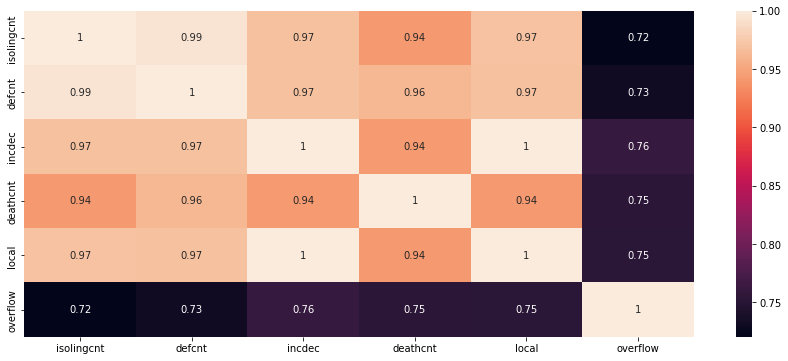

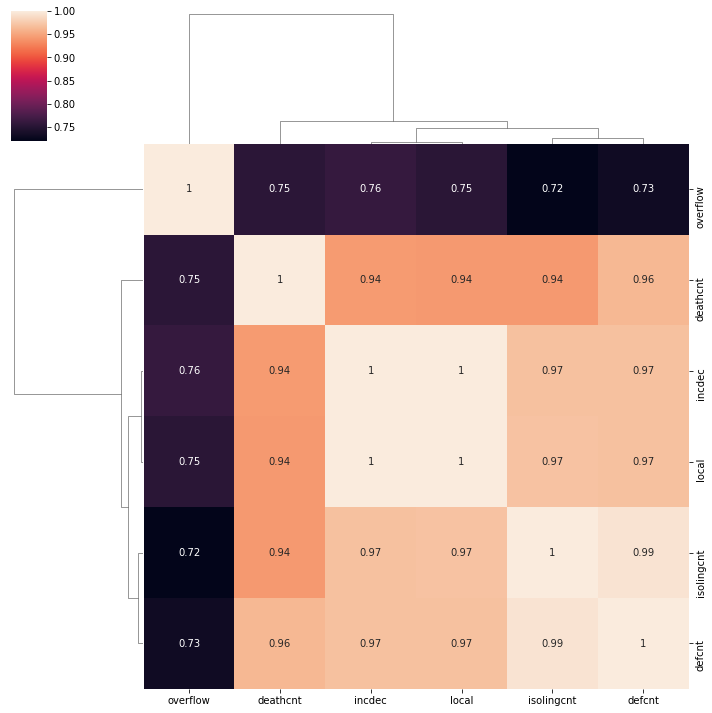

In [54]:
import seaborn as sns
sns.heatmap(newDf.corr(), annot=True)
sns.clustermap(newDf.corr(), annot=True)

In [57]:
# 날짜형식은 년-월-일

newDf['Date']=newDf['stdday'].str.split('일').str[0]
newDf['Date']=newDf['Date'].str.replace('년','-')
newDf['Date']=newDf['Date'].str.replace('월','-')
newDf['Date']=newDf['Date'].str.replace(' ','')

newDf

C:\Users\Hs\AppData\Local\Temp/ipykernel_23200/2812771521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDf['Date']=newDf['stdday'].str.split('일').str[0]
C:\Users\Hs\AppData\Local\Temp/ipykernel_23200/2812771521.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDf['Date']=newDf['Date'].str.replace('년','-')
C:\Users\Hs\AppData\Local\Temp/ipykernel_23200/2812771521.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,stdday,ji,isolingcnt,defcnt,incdec,deathcnt,local,overflow,Date
1,2021년 08월 31일 00시,제주,270,2602,9,2,8,1,2021-08-31
2,2021년 08월 31일 00시,경남,858,9980,56,31,56,0,2021-08-31
3,2021년 08월 31일 00시,경북,618,7100,27,88,27,0,2021-08-31
4,2021년 08월 31일 00시,전남,206,2600,14,19,13,1,2021-08-31
5,2021년 08월 31일 00시,전북,354,3588,26,60,26,0,2021-08-31
...,...,...,...,...,...,...,...,...,...
511,2021년 08월 04일 00시,울산,145,3262,15,41,14,1,2021-08-04
512,2021년 08월 04일 00시,대전,1121,4459,59,30,59,0,2021-08-04
513,2021년 08월 04일 00시,광주,215,3464,16,24,15,1,2021-08-04
514,2021년 08월 04일 00시,인천,1144,9342,83,66,83,0,2021-08-04


In [59]:
from datetime import datetime, timedelta

newDf['Date']=pd.to_datetime(newDf['Date'])
newDf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 1 to 515
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   stdday      464 non-null    object        
 1   ji          464 non-null    object        
 2   isolingcnt  464 non-null    int32         
 3   defcnt      464 non-null    int32         
 4   incdec      464 non-null    int32         
 5   deathcnt    464 non-null    int32         
 6   local       464 non-null    int32         
 7   overflow    464 non-null    int32         
 8   Date        464 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int32(6), object(2)
memory usage: 41.5+ KB


C:\Users\Hs\AppData\Local\Temp/ipykernel_23200/2077967199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDf['Date']=pd.to_datetime(newDf['Date'])


In [63]:
newDf['year']=newDf['Date'].dt.year
newDf['month']=newDf['Date'].dt.month
newDf['dayName']=newDf['Date'].dt.day_name()

newDf

C:\Users\Hs\AppData\Local\Temp/ipykernel_23200/3281997138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDf['year']=newDf['Date'].dt.year
C:\Users\Hs\AppData\Local\Temp/ipykernel_23200/3281997138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDf['month']=newDf['Date'].dt.month
C:\Users\Hs\AppData\Local\Temp/ipykernel_23200/3281997138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,stdday,ji,isolingcnt,defcnt,incdec,deathcnt,local,overflow,Date,year,month,dayName
1,2021년 08월 31일 00시,제주,270,2602,9,2,8,1,2021-08-31,2021,8,Tuesday
2,2021년 08월 31일 00시,경남,858,9980,56,31,56,0,2021-08-31,2021,8,Tuesday
3,2021년 08월 31일 00시,경북,618,7100,27,88,27,0,2021-08-31,2021,8,Tuesday
4,2021년 08월 31일 00시,전남,206,2600,14,19,13,1,2021-08-31,2021,8,Tuesday
5,2021년 08월 31일 00시,전북,354,3588,26,60,26,0,2021-08-31,2021,8,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
511,2021년 08월 04일 00시,울산,145,3262,15,41,14,1,2021-08-04,2021,8,Wednesday
512,2021년 08월 04일 00시,대전,1121,4459,59,30,59,0,2021-08-04,2021,8,Wednesday
513,2021년 08월 04일 00시,광주,215,3464,16,24,15,1,2021-08-04,2021,8,Wednesday
514,2021년 08월 04일 00시,인천,1144,9342,83,66,83,0,2021-08-04,2021,8,Wednesday


In [62]:
newDf['dayName']

newDf['stdday'].unique()

array(['2021년 08월 31일 00시', '2021년 08월 30일 00시', '2021년 08월 29일 00시',
       '2021년 08월 28일 00시', '2021년 08월 27일 00시', '2021년 08월 26일 00시',
       '2021년 08월 25일 00시', '2021년 08월 24일 00시', '2021년 08월 23일 00시',
       '2021년 08월 22일 00시', '2021년 08월 21일 00시', '2021년 08월 20일 00시',
       '2021년 08월 19일 00시', '2021년 08월 18일 00시', '2021년 08월 17일 00시',
       '2021년 08월 16일 00시', '2021년 08월 15일 00시', '2021년 08월 14일 00시',
       '2021년 08월 13일 00시', '2021년 08월 12일 00시', '2021년 08월 11일 00시',
       '2021년 08월 10일 00시', '2021년 08월 09일 00시', '2021년 08월 08일 00시',
       '2021년 08월 07일 00시', '2021년 08월 06일 00시', '2021년 08월 05일 00시',
       '2021년 08월 04일 00시'], dtype=object)

-----------제주--------------------


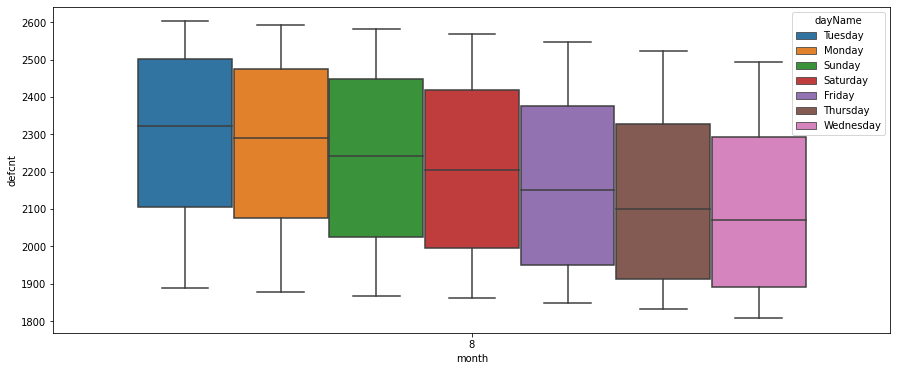

-----------경남--------------------


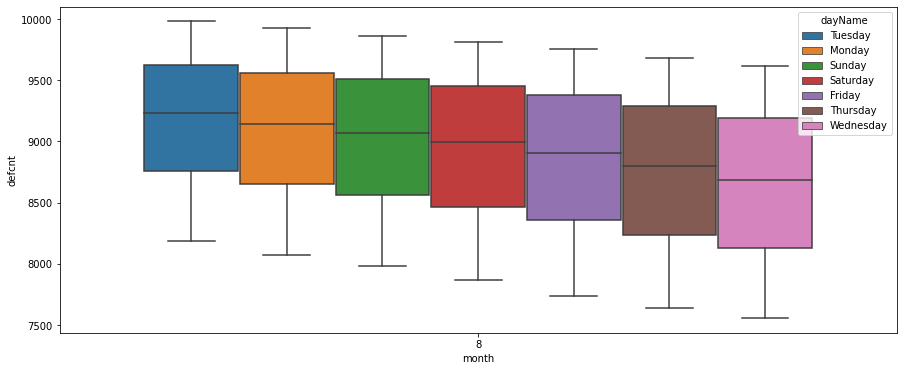

-----------경북--------------------


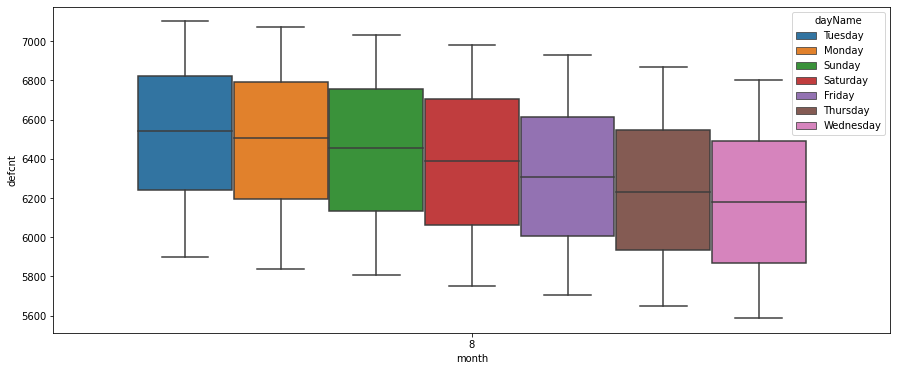

-----------전남--------------------


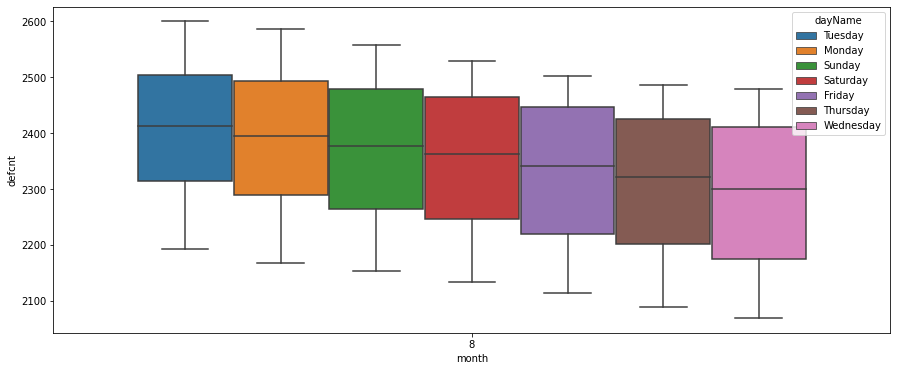

-----------전북--------------------


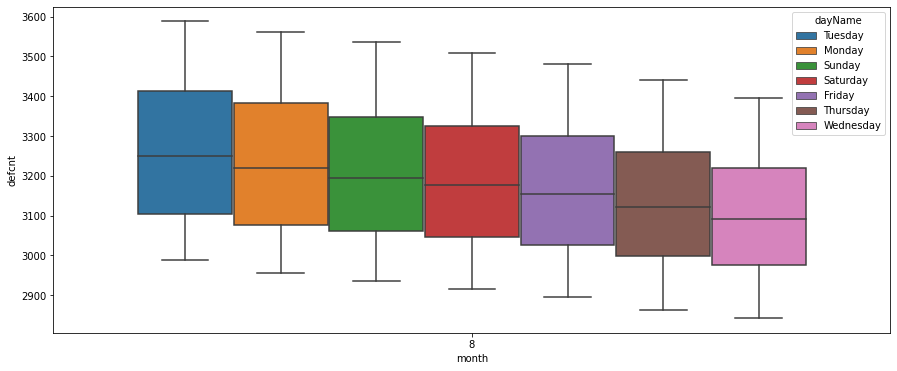

-----------충남--------------------


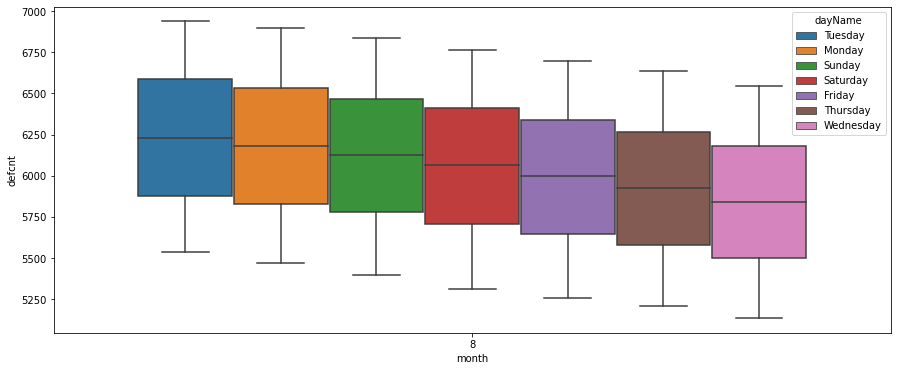

-----------충북--------------------


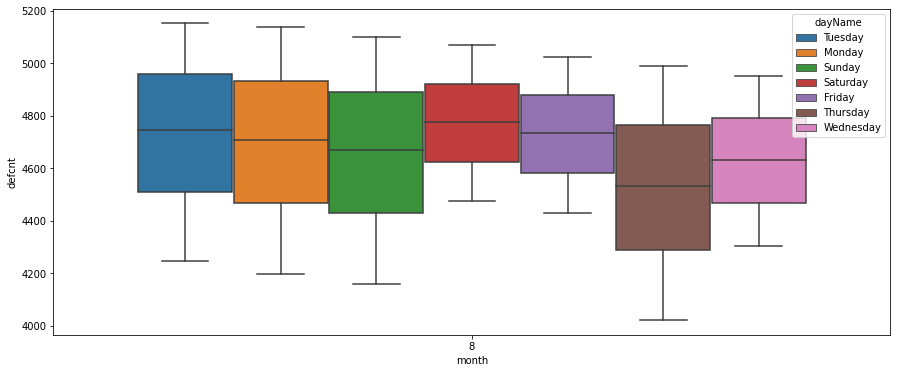

-----------강원--------------------


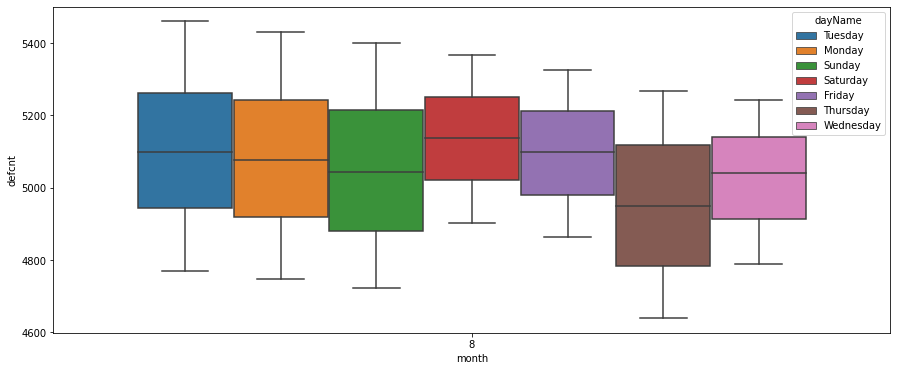

-----------경기--------------------


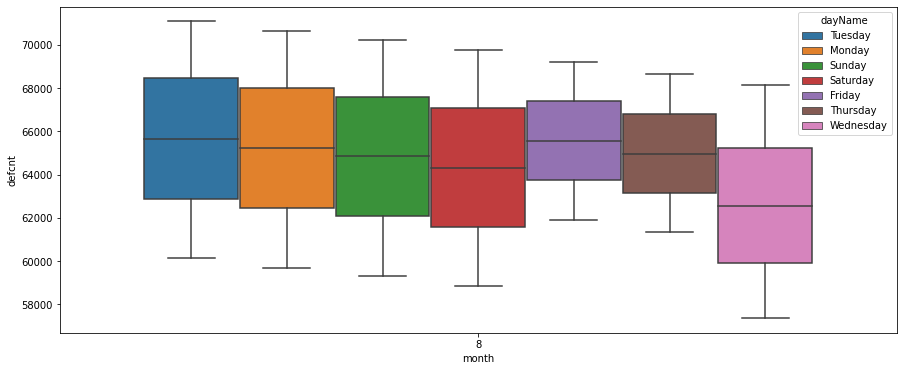

-----------세종--------------------


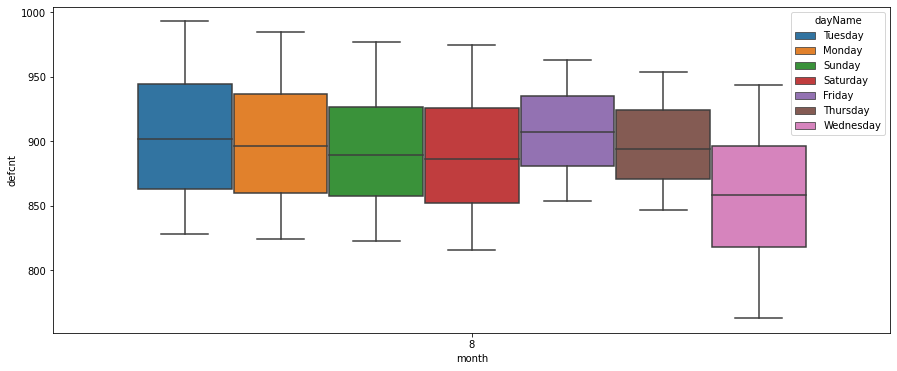

-----------울산--------------------


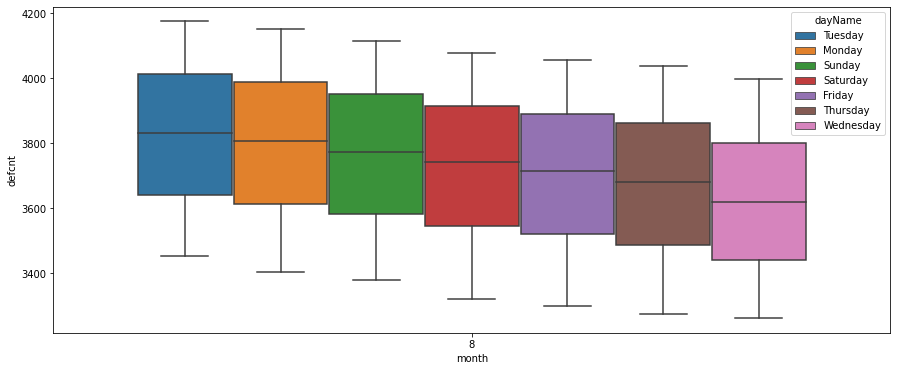

-----------대전--------------------


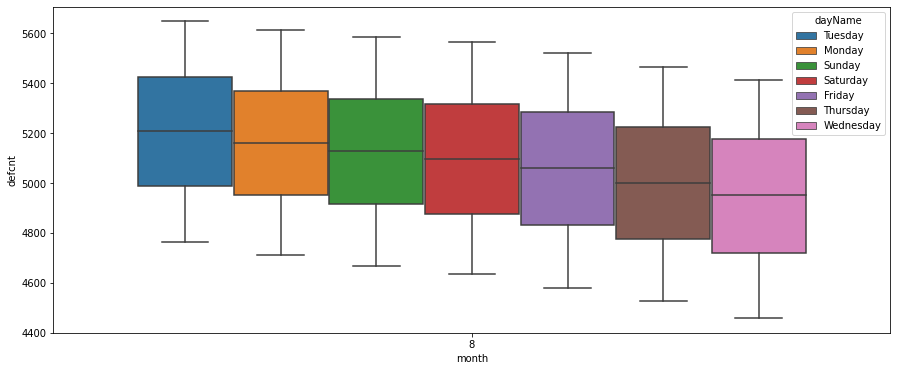

-----------광주--------------------


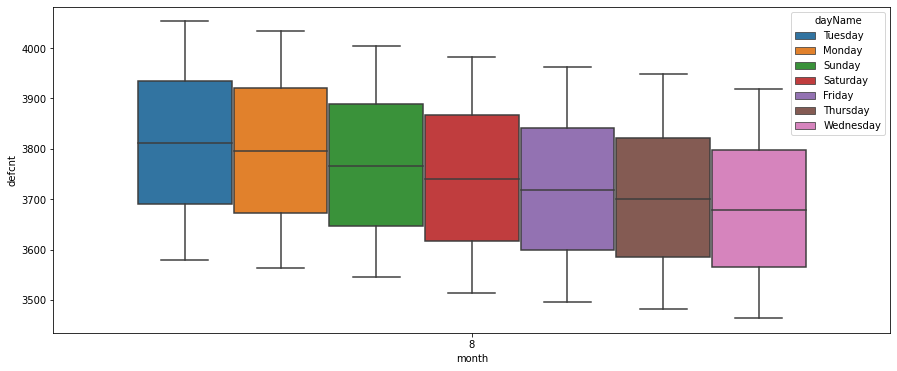

-----------인천--------------------


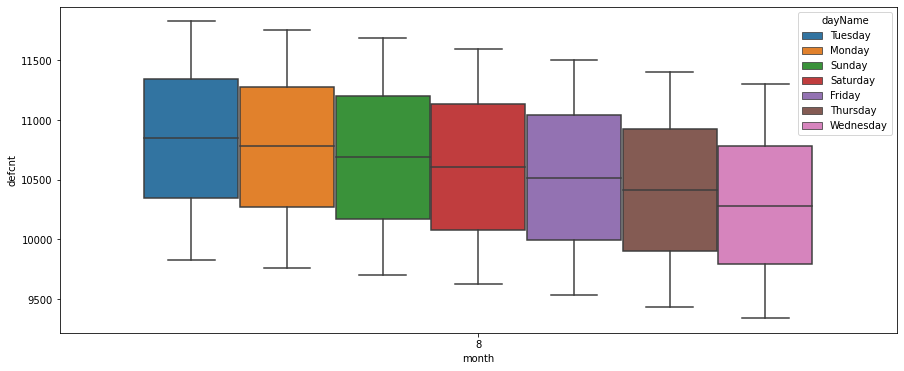

-----------대구--------------------


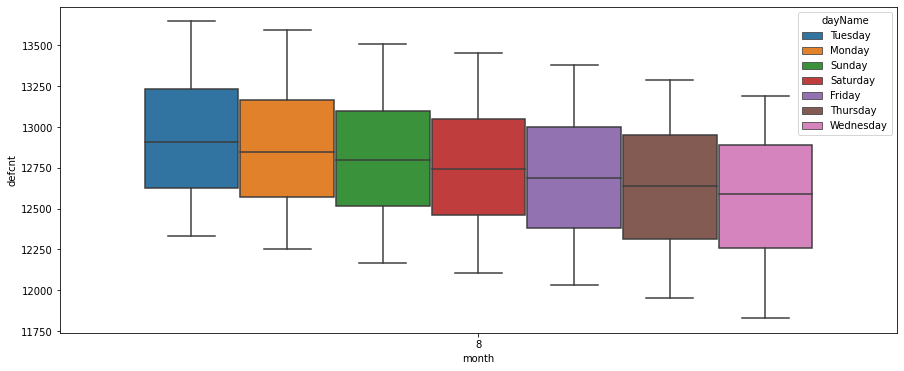

-----------부산--------------------


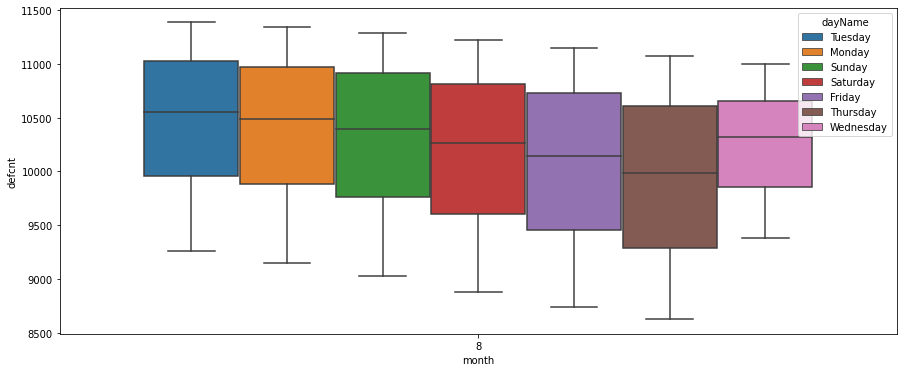

-----------서울--------------------


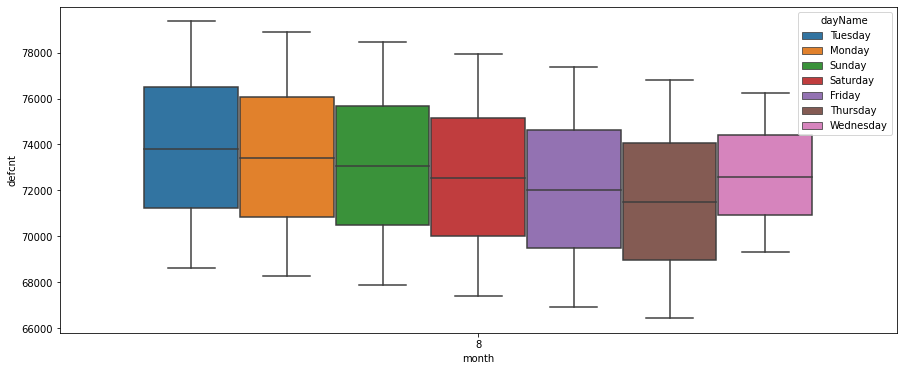

In [64]:
import matplotlib.pyplot as plt
List = newDf['ji'].unique()

for i in List:

    print('-----------'+ i + '--------------------')
    tmp=newDf[newDf['ji']==i]

    #sns.boxplot(x='dayName',y='defcnt',data=tmp)
    sns.boxplot(x='month',y='defcnt',hue=tmp['dayName'],data=tmp)
    plt.show()